In [ ]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.ThompsonSampling.Environment import *
from algorithms.ThompsonSampling.TS_Learner import *
from algorithms.ThompsonSampling.Greedy_Learner import *

In [4]:
n_arms = 8
price = np.array([300, 325, 350, 375, 400, 425, 450, 475])
p = np.array([0.04, 0.035, 0.7275, 0.9225, 0.802, 0.0150, 0.0125, 0.0075])
assumed_optimal_price = 425
opt = np.array([assumed_optimal_price])

T = 1000

n_experiments = 1000
ts_rewards_per_experiment = []
gr_rewards_per_experiment = []


In [5]:
for e in range(0, n_experiments):
    env = Environment(n_arms=n_arms, probabilities=p, price=price)
    ts_learner = TS_Learner(n_arms=n_arms)
    gr_learner = Greedy_Learner(n_arms=n_arms)
    ts_rewards = []
    gs_rewards = []
    for t in range(0, T):

        # Thompson Sampling

        pulled_arm = ts_learner.pull_arm()
        reward = env.round(pulled_arm)
        reward_price = env.round_price(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        ts_rewards.append(reward_price)

        # Greedy Learner

        pulled_arm = gr_learner.pull_arm()
        reward = env.round(pulled_arm)
        reward_price = env.round_price(pulled_arm)
        gr_learner.update(pulled_arm, reward)

        gs_rewards.append(reward_price)

    ts_rewards_per_experiment.append(ts_rewards)
    gr_rewards_per_experiment.append(gs_rewards)    

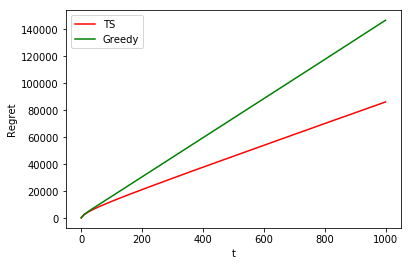

In [6]:
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gr_rewards_per_experiment, axis=0)), 'g')
plt.legend(["TS", "Greedy"])

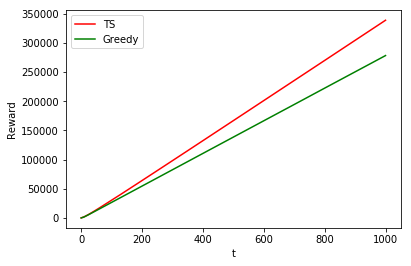

In [7]:
plt.figure(1)
plt.xlabel("t")
plt.ylabel("Reward")
plt.plot(np.cumsum(np.mean(ts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(gr_rewards_per_experiment, axis=0)), 'g')
plt.legend(["TS", "Greedy"])